# Time Series Visualizations
## Learning Objectives:

By the end of this lesson, students will be able to:

Visualize time series in pandas and matplotlib.

Use Matplotlib Tick Formatters and Locators.

Perform advanced customization to visuals

## Time Series Visualizations
We will continue to use the weather dataset from the previous lessons. Make sure you have changed the date to a datetime and set it as the index. (See previous lessons if needed)

Let's focus on the average temperature for now ("meantemp")

In [1]:
import pandas as pd
import datetime as dt
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"
df = pd.read_csv(url)
df['datetime'] = pd.to_datetime(df['date'])

In [2]:
df = df.set_index('datetime')

In [3]:
ts = df['meantemp'].copy()
ts

datetime
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

In [4]:
ax = ts.plot();


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

[6.4, 4.8]

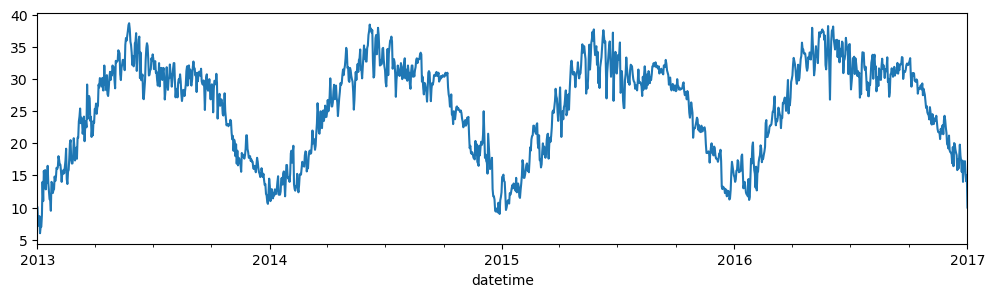

In [6]:
## plot a 12x3 figure
ts.plot(figsize=(12,3));

That looks much better! It would be tedious to constantly have to set the figsize for every visualization, so we can actually change the default figsize using plt.rcParams!

All we have to do is set the figure.figsize param equal to the new (Width,Height) we want as our default.

In [7]:
## setting the default figsize for this notebook
plt.rcParams['figure.figsize'] = (12,3)

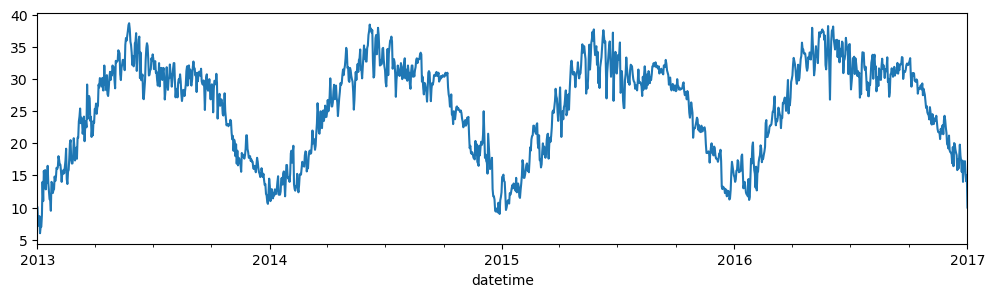

In [8]:
ax = ts.plot();

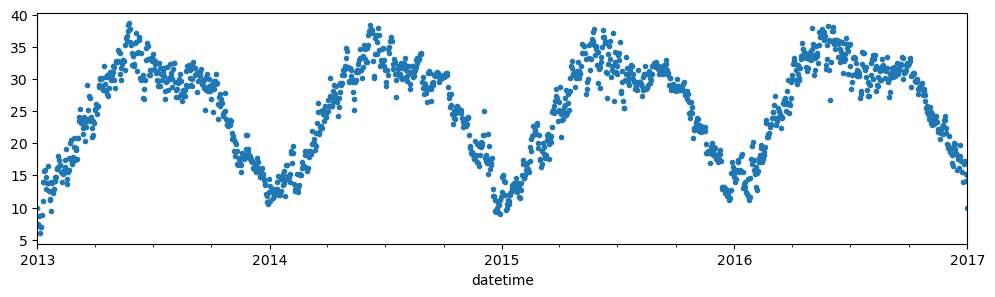

In [10]:
# Plot - Style/ Level of Detail
# If we just want to visualize the dates without the connecting lines, we can add style='.'
## we can also visualize just the markers without the line
ax = ts.plot(style='.');

We can also keep our line, but ADD markers as well either by:
- Using a "style" arg for .plot that includes a valid marker (".","o", etc.) AND a line style.
    - e.g. ".-" or "o--" or "<-" etc.
    - See the marker documentation for other marker styls
    - Valid line styles are "-","--",":"

Use the marker argument and specify a valid marker symbol (see link above).

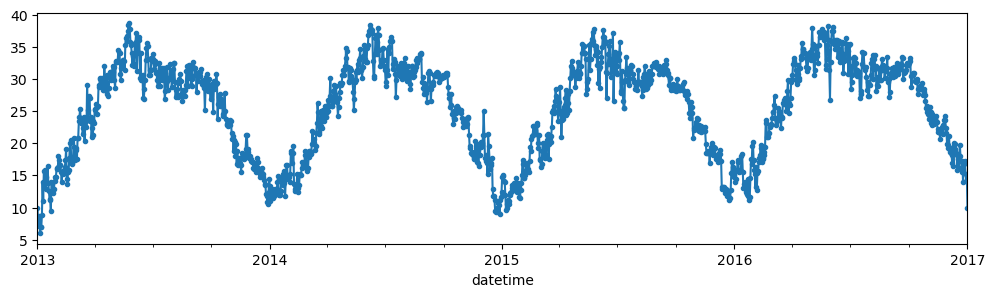

In [11]:
## Using style to add markers
ax = ts.plot(style='.-')

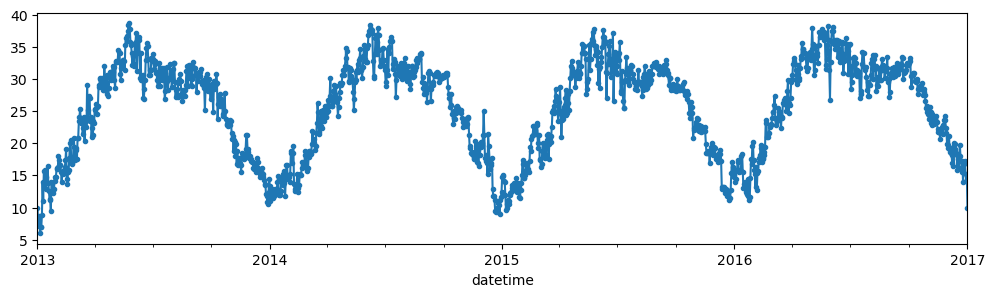

In [12]:
## Using marker to add markers
ax = ts.plot(marker='.')

## Formatting Date Xticks
For more complex formatting, there are tools in matplotlib designed to allow us to customize the dates on our axis.

## Matplotlib's Artists
There are special classes in base matplotlib (not in matplotlib.pyplot) that are designed to update the spacing and text formatting of our x and y ticks.

- Tick-Formatting Artists:
    - For general use cases, these artists are located in matplotlib's ticker submodule.
    - Dates, however, have their own submodule called dates

In [13]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

- Each matplotlib axis can have both major and minor ticks.
- Matplotlib use 2 types of artists to control ticks:
    - a Locator which determines WHERE the ticks appear
    - and a Formatter which determines the format of the tick label's text.
- The way we use these Artist objects is to:
    - Instantiate an appropriate Locator and/or Formatter
        - e.g.: locate_months = mdates.MonthLocator()
    - Apply your locator and/or formatter to the correct axis and types of ticks:
        - Start the line of code by slicing out the axis you want to customize from your Axis. (e.g. ax.xaxis or ax.yaxis)
        - Then chain on the "set_major_locator"/"set_major_formatter" to customize the major ticks. e.g. ax.xaxis.set_major_locator(locate_months).
- These formatters won't apply rotation or changes to the text alignment, so we will do that after updating our ticks using the ax.set_xticklabels() method.

We will demonstrate how these tools work.

In [14]:
## creating our tick locators and formatters
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
# create the formatter to display 3-letter month names + 2-digit year
fmt_months = mdates.DateFormatter("%B-%y")

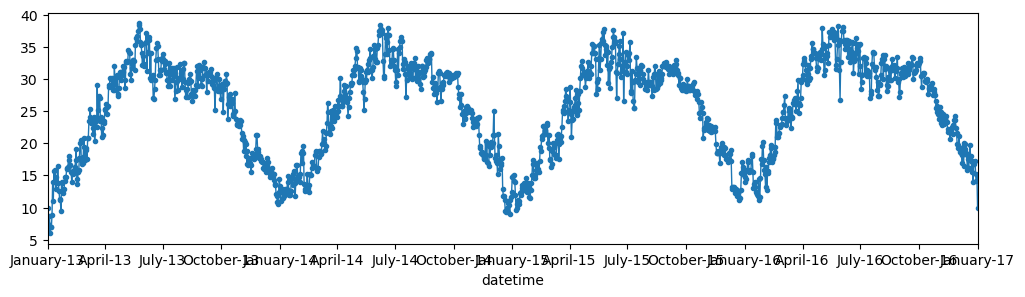

In [15]:
# Now that we have defined our locator and formatter, lets use these to produce our visual.

## Plot the time series with pandas
## Adding . markers and a thinner line
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)

Ok, this isn't quite what we wanted, but you can see we are moving in the correct direction! Stylizing visuals is an iterative process!

## Fixing Overlapping Labels
- For simple date label formatting, we can take advantage of the matplotlib Figure method: fig.autofmt_xdate()
- However, this requires that we have the figure itself. When starting a visualization with Pandas, we only receive the Axis.
- Three ways to get the Figure:
    - Use ax.get_figure():
        - If you already have the axis.
    - Use plt.gcf() #get current figure:
        - If you do not have the axis and are running the cell that creates the figure.
    - Make the fig and ax first and then use fig, ax = plt.subplots() followed by ts.plot(ax=ax)

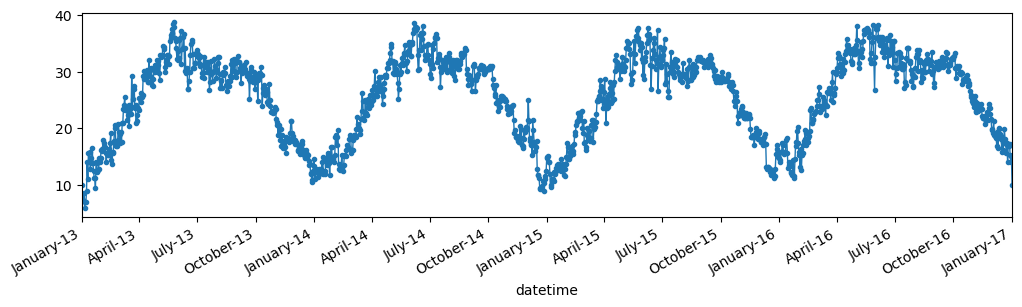

In [16]:
##  Plot the time series with pandas
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)
##  Using ax.get_figure()
fig = ax.get_figure()
fig.autofmt_xdate()

## Customizing Our Ticks (advanced)
- The figure above now displays the month, but its harder to visually see the years.
- To fix this, we will apply 2 locators/formatters:
    - One for the major ticks
    - One for the minor ticks
- For the figure above, we would like to:
    - Place minor ticks at every 3 months
    - Label minor ticks with 3-letter month names
    - Place major ticks at every year.
    - Label years with 4-digit years.
    - Make the grid lines for years darker than the grid lines for months.

In [17]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

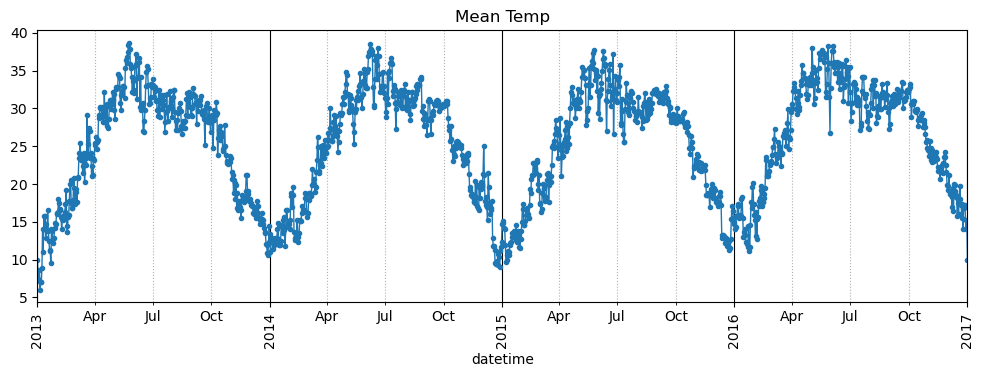

In [18]:
## Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp',marker='.',lw=1)
## customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
## customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

## Some Additional Customizations
### Increasing Font Size of Major Tick Labels
- Finally, we are going to change the formatting of our major xticklabels to use a large fontsize and bold fontweight.

/var/folders/yt/hk1fgcjn4w16b997bctnz_kr0000gn/T/ipykernel_73038/3965544766.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )


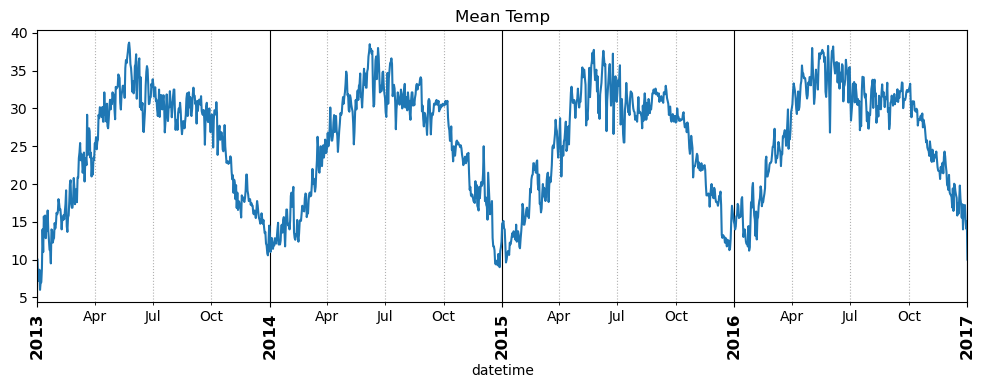

In [19]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp');
##  saving current xticks
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

- The warning message we receive is a bit of a red-herring. There are some advanced scenarios where it may cause an issue, but for our use we will likely not run into the problem.
- To make the warning disappear though, we can also set the xticks themselves when we set the xticklabels.

NOTE: when combining tick formatters/locators & ax.set_xticklaebs(): - you need to use ax.set_xticklabels() before applying the formatters, or you may lose your labels!

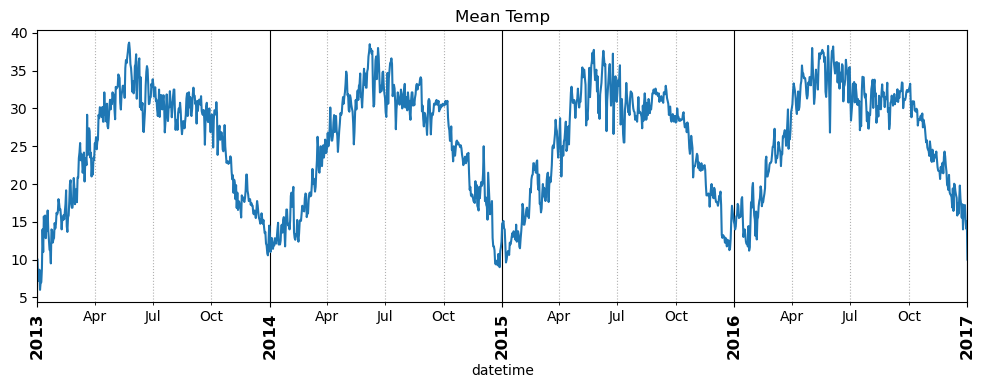

In [20]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp');
##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

## Creating a Function for your Code
Once you have decided on a style that you like, you can work more efficiently by defining your plot formats and styles within a function. Take some time to read this function! Do you understand it? Think about how you could modify this function to achieve different results!


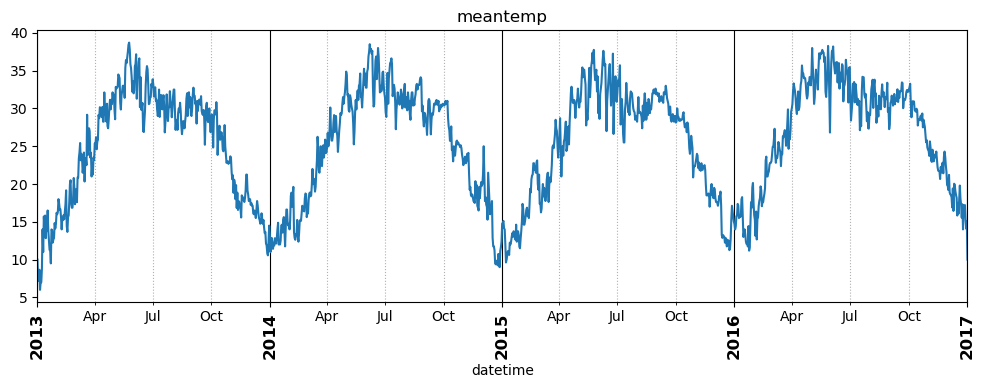

In [21]:
## we've done enough customization that it makes sense to bundle this in a function
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax
plot_dates(ts);

## Summary
This lesson was all about creating professional, customized visuals for time series plots. Starting with simple modifications such as the figure size, we demonstrated how to change the style and how to leverage Matplotlibs Artists to locate and format ticks and labels. We showed some additional advance techniques to further refine your visual. Finally, we demonstrated how to save these customization within a function for future use. It can take some time and research to realize what options are even available to you. Playing around with the style of your visuals can be time consuming, but creating a high quality visual is worth the effort.



# Overhauling Matplotlib Defaults

## Learning Objectives:

- Explore and set a "context" for visuals
- Adjust the relative font size

## Using seaborn's sns.set_context to simplify resizing text
- Overall, we have a nice visualization thus far. One major consideration for our final figure is the overall text size and readability.
- Instead of manually setting the font size and parameters for every piece of text on our figure (major/minor tick labels, xlabel/ylabel, title, etc.):
    - we can use seaborn's sns.set_context function!
- According to the documentation for the set_context function, it will:
    - "Set the parameters that control the scaling of plot elements. This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style."
- The function accepts the following parameters:
    - "context":
        - The scenario where your figure will viewed.
        - Options are:
            - "notebook"
            - "talk"
            - "paper"
            - "poster"
        - "font_scale":
            - a float that represents how much more to scale text
            - 1=default size, 2= double size, 0.5 = half size, etc.

## Temporarily using a context with sns.plotting_context
- If you only want to temporarily change the context settings, we can use sns.plotting_context (documentation).
        - We use the word "with" to temporarily apply the settings, just like when we temporarily opened local files.
- Example:
- We are going to first explore some options using the temporary sns.plotting_context. Once we have decided on our final format, we will use sns.set_context.

Note that this is using the custom function (plot_dates) we created in an earlier lesson!

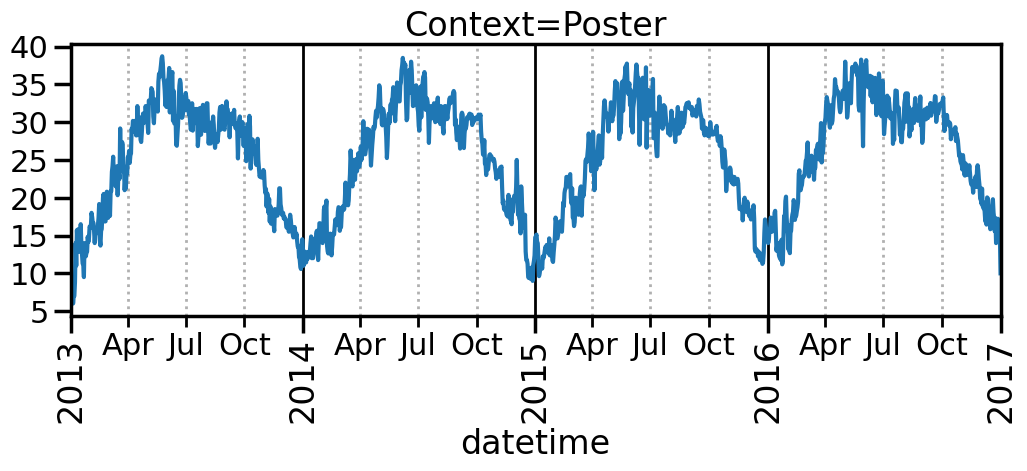

In [22]:
import seaborn as sns
with sns.plotting_context('poster'):    
    fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,title="Context=Poster")

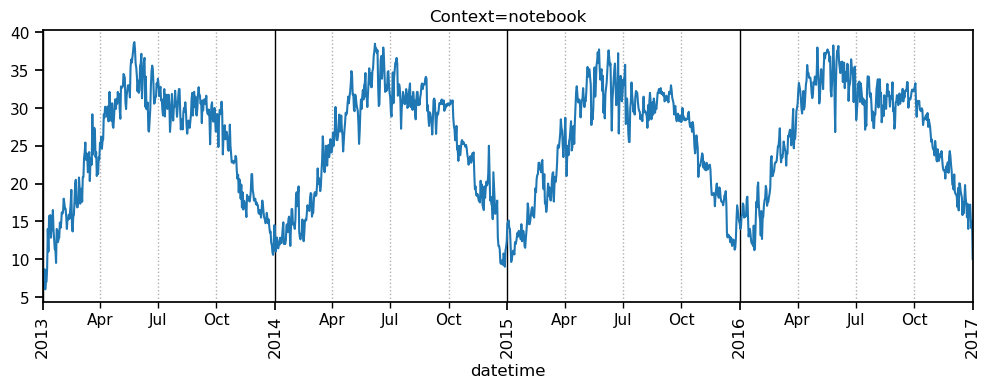

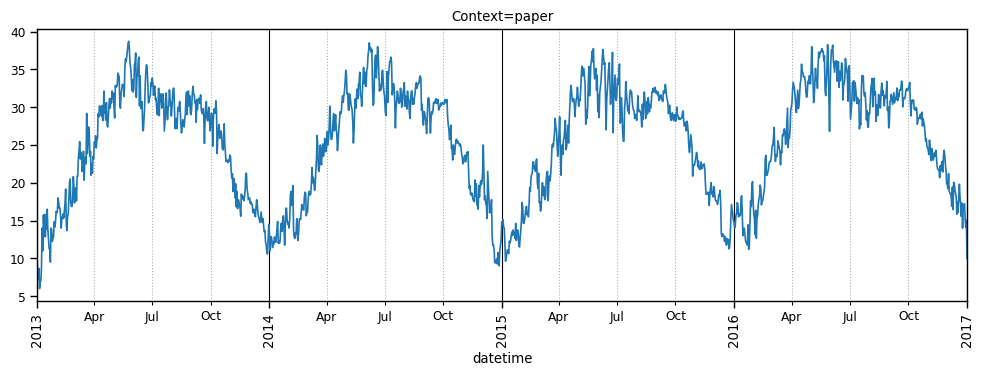

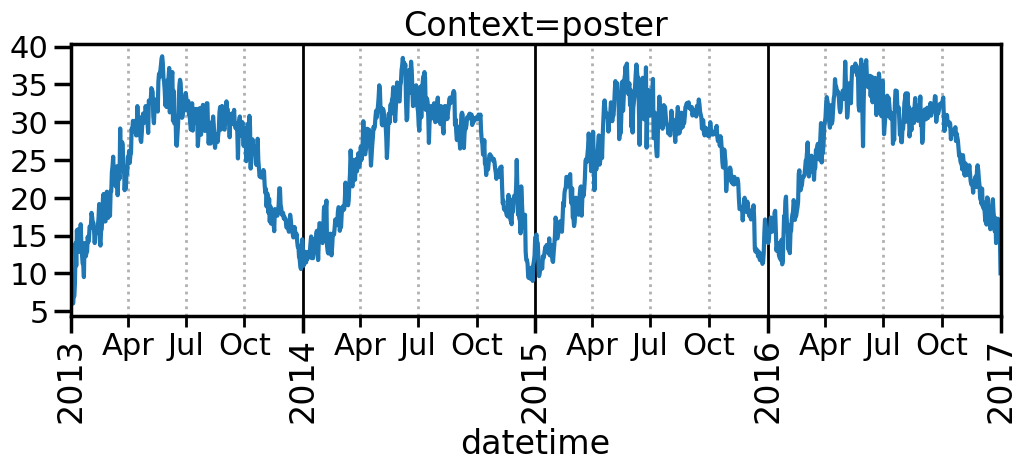

In [23]:
# Let's explore all of the context options at once. We will include the 
# context in the title for reference as we view the outputs.
## temporarily changing context
for context in ['notebook','paper','poster','talk']:
    with sns.plotting_context(context):
        fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,
                            title=f"Context={context}")

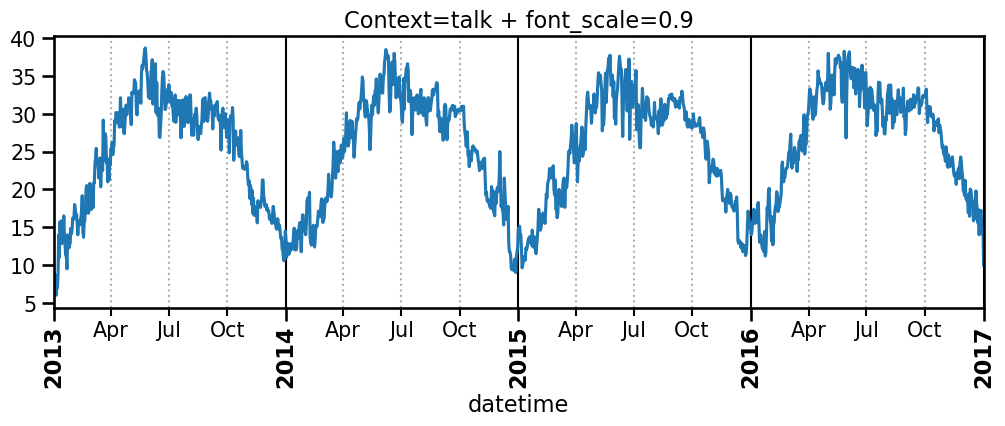

In [24]:
# As always, there are so many options for changing the style of your visuals! 
# In this case, let's try using "talk" but also scaling the font a little smaller.
with sns.plotting_context("talk", font_scale=0.9):
    fig,ax = plot_dates(ts,xtick_fontsize=None,
                        xtick_fontweight="bold",
                        title=f"Context=talk + font_scale=0.9")

In [25]:
# Ok, let's assume we are happy with the style of the graph above. Now we will 
# make the settings permanent by using sns.set_context

# Using sns.set_context

## making the settings permanent for the notebook:
sns.set_context("talk", font_scale=0.9)
fig,ax = plot_dates(ts,xtick_fontsize=None,
                    xtick_fontweight="bold")

In [26]:
# Now we can easily apply the same settings to the next graph in our notebook! 
# Let's take a look at wind_speed instead of meantemp.

##  Visualize wind_speed instead of meantemp
ts = df['wind_speed'].copy()
plot_dates(ts);

- Notice how jagged our line for our time series is. The reason for this is because we seem to have values for every single DAY. But we are visualizing 4 full years of daily data!
- We can change the frequency of our time series and calculate aggregate measure (like the mean, sum, etc).
- In the next lesson we will learn how to resample time series with Pandas.

## Summary
This lesson introduced Seaborn's context feature. We first temporarily explored the contexts and adjusted the relative font size. once we were satisfied with our selections, we set the context and font.



### Additional Resources
For more on using seaborn's visualization settings:
https://www.codecademy.com/article/seaborn-design-i
Seaborn Guide: Controlling Figure aesthetics
https://seaborn.pydata.org/tutorial/aesthetics.html
Seaborn Documentation: List of all "Themeing" Functions
https://seaborn.pydata.org/api.html#themeing



# Resampling

## Learning Objectives:

- Resample Time Series to various frequencies.
- Select the ideal aggregation method for each feature.
- Impute null values in time series data.
- Create a dictionary of aggregations and use with .agg() to specify different aggregation methods to each feature

## Converting Time Series Frequencies - the Right Way
- Let's revisit the weather dataset from the prior lesson, but let's select a different feature - wind_speed.

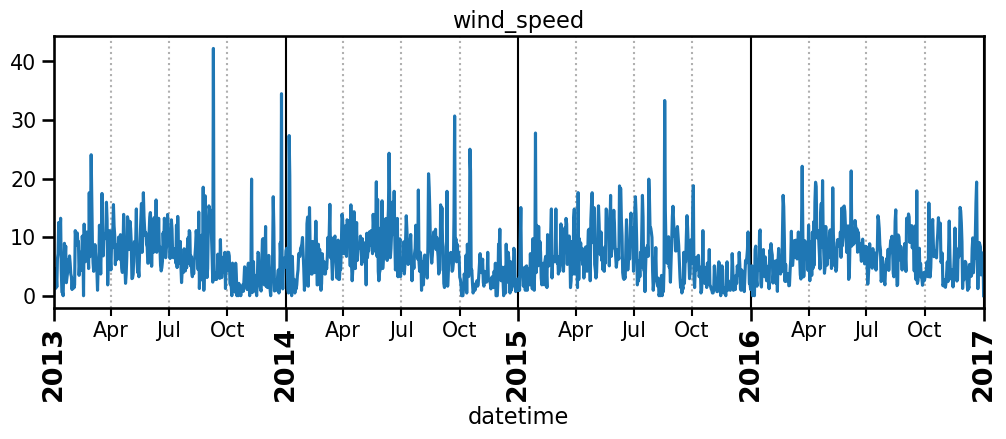

In [27]:
ts = df['wind_speed'].copy()
plot_dates(ts);

- Let's revisit the datetime index that we created in an earlier lesson.
- Let's check JUST the index itself so we can get some additional information.

In [28]:
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

- We can see in the display above that our index is indeed a DatetimeIndex (with a dtype of datetime64[ns]), but notice that it says "freq=None" in the last line of the output.
- Right now, we have a datetime index with a measurement for each day, but Panda's doesn't know that it should be automatically treated as a "daily" frequency time series.
- Once a time series has a frequency, it MUST have a value for every single time step in that frequency (so for every day if converting to daily, every hour if converting to hourly, etc.)

## Setting the Frequency
- If the dates in the datetime index are already in the desired frequency, we can set the frequency using df.asfreq(CODE) where "CODE" is the correct frequency string code for pandas.
- For a complete list of pandas frequency codes, see the table in the "date offsets" section of the Times Series/Date functionality guide.
https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects

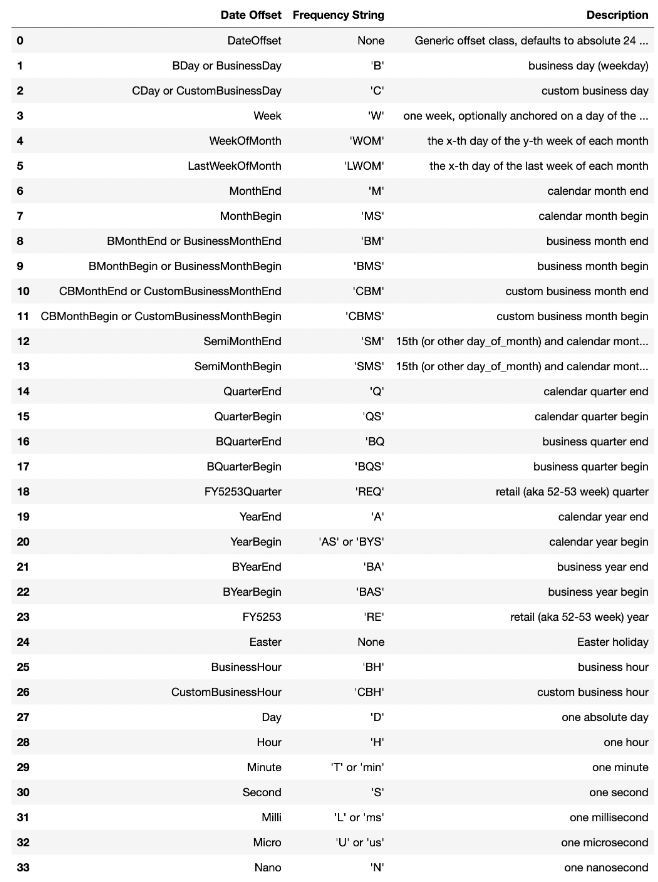

In [29]:
# Since our time series is already in daily format, we can use ts.asfreq("D") to set the frequency.
##  set daily frequency
ts = ts.asfreq('D')
##  preview the index again
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq='D')

- We can see that the frequency for our index is now "D" for daily. Great!
- But what if we tried to use a different frequency that did not match our data?
    - Let's try using the hourly frequency and see what happens:
First, let's go back to our original data.

In [30]:
#  remake ts
ts = df['wind_speed'].copy()
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

In [31]:
# Now we will try applying the hourly frequency to the data. (remember that 
# this data was collected daily). What do you think will happen when we set 
# the frequency to hourly? Try it below to see if you predicted correctly!

##  try making daily data into an hourly frequency
ts_H = ts.asfreq("H")
ts_H

datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
                      ... 
2016-12-31 20:00:00    NaN
2016-12-31 21:00:00    NaN
2016-12-31 22:00:00    NaN
2016-12-31 23:00:00    NaN
2017-01-01 00:00:00    0.0
Freq: H, Name: wind_speed, Length: 35065, dtype: float64

We can see that when we try to set the frequency to a more frequent one (e.g. daily to hourly. Monthly to daily, etc) it creates many null values. This makes sense because there is simply no data to correspond to that higher frequency.

Once we set a datetime frequency we MUST have rows for every single time step in that frequency.

But, could we set our frequency to a less frequent one (e.g. daily to weekly, or weekly to monthly, etc)? Here we should have all the data available. What do you think will happen?

Let's try to convert our daily data to Monthly (MS) to include the first day of every month:

In [32]:
ts_MS = ts.asfreq("MS")
ts_MS.name = "asfreq"
ts_MS.head()

datetime
2013-01-01     0.000000
2013-02-01     2.220000
2013-03-01    24.066667
2013-04-01     4.400000
2013-05-01    12.685714
Freq: MS, Name: asfreq, dtype: float64

It seemed to work! BUT...it just removed every row that did not fall on the first of the month! That is a lot of data to just completely drop!

For reference, here is the plot of our first-of-the-month data (where all other values were dropped)

In [33]:
plot_dates(ts_MS);

There is another approach to changing datetime frequency that gives us the ability to aggregate the values that would otherwise just be deleted. We will explore this in the following section:

## Resampling (Upsampling/Downsampling)

df.resample() works similarly to df.groupby().

It prepares data to be aggregated, but it doesn't actually produce any data until we add an aggregation method.

E.g. .mean(), .sum(),.min(), etc

There are two main ways to resample: Downsampling and Upsampling. You may recall learning these terms associated with addressing class imbalance. They apply to time series as well and are related to the direction of the frequency change.

- Downsampling reduces the sampling rate. For example, going from daily to monthly data.
- Upsampling increases the sampling rate. For example, going from daily to hourly data.


## Downsampling
Let's downsample our daily data to Month-Start frequency ("MS") and take the average monthly wind speed.

In [34]:
ts_MS_res = ts.resample("MS").mean()
ts_MS_res.name = 'Resampled'
ts_MS_res.head()

datetime
2013-01-01    4.833913
2013-02-01    7.474090
2013-03-01    8.757270
2013-04-01    8.046385
2013-05-01    8.943452
Freq: MS, Name: Resampled, dtype: float64

Notice that you have the same first-of-the-month dates, but the values associated with each are different than when we just reset the frequency above!

Side by Side comparison of output:

Just set to Start of Month (no resampling) Set to start of the month WITH Resampling using Mean

Notice that the values on the right are based on the resampling technique where the mean was used to aggregate the value. These are very different than simply taking the value that happened to occur on the first of the month. It is essential to be aware of what is happening to your data and understand these differences so you can choose the appropriate method for your use case.

To further highlight the difference, here is a plot of the non-resampled and resampled data:



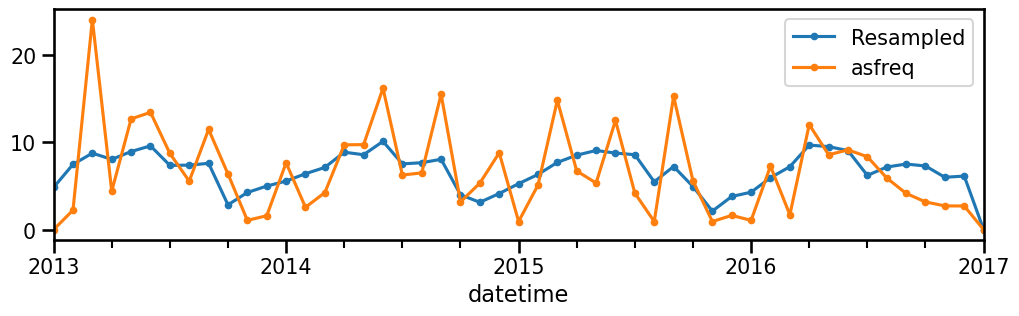

In [35]:
ax = ts_MS_res.plot(style='.-')
ts_MS.plot(style='.-',ax=ax)
ax.legend();

Wow... look at how different the asfreq vs .resample().mean() time series are! The asfreq one is way more jagged and is a less accurate summary of the wind speed during this time period.

## Use .agg() to Resample Time Series with Multiple Columns using Different Aggregation Methods

- Revisiting the entire dataframe for aggregation.
- When working with an entire dataframe as time series, there are some additional complexities/considerations.
- For example, what if we wanted to get our daily data as week frequency BUT: for each feature, we want a different aggregation method?
- Specifically,
    - meantemp: mean
    - humidity: max
    - wind_speed: max
    - meanpressure: mean
- We can create a dictionary of each feature and the aggregation method we wish to apply to it. Then we ca use .agg() with resample and include our dictionary within the parentheses.

In [36]:
df_ts = df.drop(columns=['date'])
agg_dictionary = {'meantemp':'mean', 'humidity':'max', 'wind_speed':'max','meanpressure':'mean'}
df_W = df_ts.resample("W").agg(agg_dictionary)
df_W

meantemp    humidity  wind_speed  meanpressure
datetime                                                   
2013-01-06   7.705556   92.000000    4.633333   1017.300000
2013-01-13  12.343537   78.600000   13.228571   1016.632653
2013-01-20  13.642857   92.166667    8.950000   1017.139456
2013-01-27  12.329592   79.666667    6.800000   1020.337075
2013-02-03  15.736905   77.571429    3.700000   1017.020578
...               ...         ...         ...           ...
2016-12-04  20.428841   84.000000    9.185714    873.901783
2016-12-11  18.318229   82.833333    5.355556   1015.619483
2016-12-18  17.871140   64.541667    9.879167   1016.727185
2016-12-25  17.123006   94.300000   19.404762   1014.901237
2017-01-01  15.085173  100.000000    8.784211   1016.661017

[209 rows x 4 columns]

In [37]:
df_W.plot(figsize=(12,8),subplots=True);


## Upsampling
Now we will return to looking at one feature (wind speed).
Now let's try to resample our Daily data as an hourly (H) mean.

In [38]:
ts_H = ts.resample("H").mean()
ts_H.name = 'Resampled'
ts_H.head()

datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
Freq: H, Name: Resampled, dtype: float64

<AxesSubplot: xlabel='datetime'>

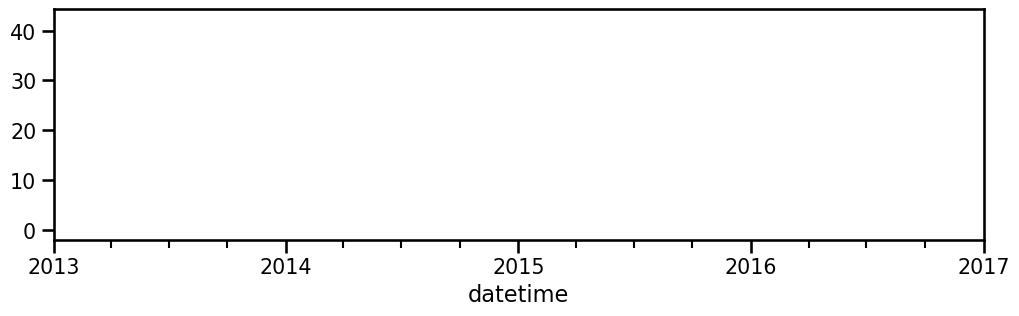

In [39]:
# Recall that when we upsample, we are trying to add more data points...But the data is not available!

ts_H.plot()

Note that there is nothing to see in the above graph! Just like we saw when we tried to use .asfreq to set the Daily data as Hourly, we created many null values in order to convert this time series to Hourly.
- While there are ways to fill in the missing values, keep in mind that we only have 1 valid data point for every 24 rows (hours). Any method we choose is going to fill up 96% (23/24) of our rows with imputed values.
- This is not acceptable nor appropriate and should be avoided.

## Handling Null Values
A more realistic scenario for applying imputation strategies is when the time series data is ALMOST the full data needed for the frequency and only a small % of values are missing. We are going to intentionally create this situation from our wind speed data to demonstrate this concept. First, we will start with the complete data set.

In [40]:
ts = df['wind_speed'].copy()
ts

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
                ...   
2016-12-28    3.547826
2016-12-29    6.000000
2016-12-30    6.266667
2016-12-31    7.325000
2017-01-01    0.000000
Name: wind_speed, Length: 1462, dtype: float64

In [41]:
# Let's take a look at the data based on the days of the week:

day_of_week = ts.index.day_name()
day_of_week.value_counts()

Tuesday      209
Wednesday    209
Thursday     209
Friday       209
Saturday     209
Sunday       209
Monday       208
Name: datetime, dtype: int64

In [42]:
# We are going to eliminate all of the weekend days (Saturday and Sunday) to simulate the missing values.

##  removing all sundays and saturdays
ts = ts[ ~day_of_week.isin(['Sunday','Saturday']) ]
ts.index.day_name().value_counts()

Tuesday      209
Wednesday    209
Thursday     209
Friday       209
Monday       208
Name: datetime, dtype: int64

Notice that we have successfully removed the Saturdays and Sundays. We also do not have any missing values yet because we have not yet set a frequency.

Let's set the index to daily frequency and then review the options for imputing null values in time series.

- Since the rest of our rows are already daily, we can use .asfreq("D").

In [43]:
ts_D = ts.asfreq("D")
ts_D.head(10)

datetime
2013-01-01     0.000000
2013-01-02     2.980000
2013-01-03     4.633333
2013-01-04     1.233333
2013-01-05          NaN
2013-01-06          NaN
2013-01-07     6.300000
2013-01-08     7.142857
2013-01-09    12.500000
2013-01-10     7.400000
Freq: D, Name: wind_speed, dtype: float64

In [44]:
# Now, as intended, we have missing values in our data set.

ts_D.isna().sum()

416

In this case, we have 416 missing values, but this is a relatively small percentage of values, so we can consider imputation strategies. Remember, in this case, we have simulated that we do NOT actually have the data for the weekends for the sake of the demonstration.

## Methods for Imputing Null Values with Time Series
Our options for filling null values with time series are different than our usual imputation methods. We wouldn't want to use the mean or median or most frequent values since those are calculated using the entire feature.

- Instead, we will explore the following options:
    - forward-filling: fill in null values using the last valid value that occurred PRIOR to the missing value.
    - back-filling: fill in null values with the next valid value that occurs AFTER the missing value.
    - interpolation: fill in null values by calculating the midpoint between the previous valid value and the next valid value.
- The first 2 options can be done by using ts.resample("D").fillna() and specifying the method argument:
    - "bfill"
    - "ffill"
- Interpolation can be applied by using the .interpolate() method after the .resample() instead of .fillna().

To help you visualize what is happening, we are going to work with just 1 week of our data set. We will slice out the first week here as our example:



In [45]:
##  saving 1 week of values to use for demonstration
example = ts_D.loc['2013-01-01':'2013-01-08']
example

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05         NaN
2013-01-06         NaN
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64

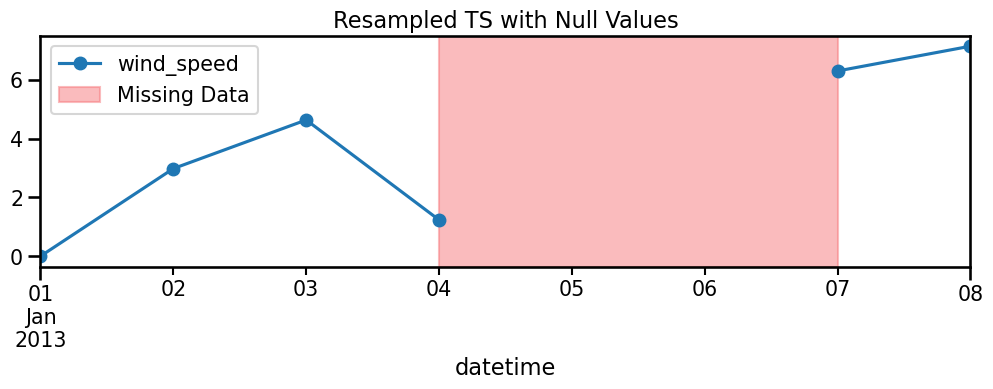

In [46]:
# First, we are just going to plot the week with our null values (no imputation yet).

##  Plotting the missing data
ax = example.plot(style='o-', title='Resampled TS with Null Values',)
##  Annotating region with null values to impute
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    1.233333
2013-01-06    1.233333
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


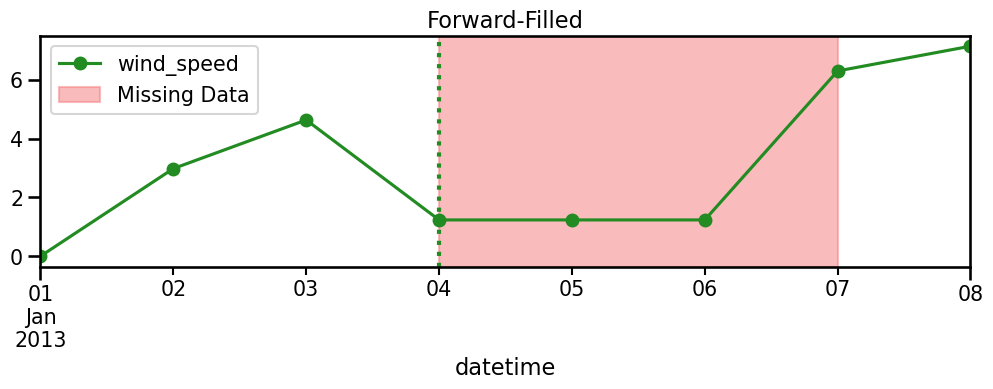

In [47]:
# Forward-Fill
# Now we are going to apply the forward fill method. This will fill in the missing value with the preceding value. What do you think the graph will look like?

ts_ffill = example.fillna(method='ffill')
print(ts_ffill)
ax = ts_ffill.plot(style='o-',title='Forward-Filled', color='forestgreen');
ax.axvline('01-04-2013',color='forestgreen',lw=3, ls=':')
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    6.300000
2013-01-06    6.300000
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


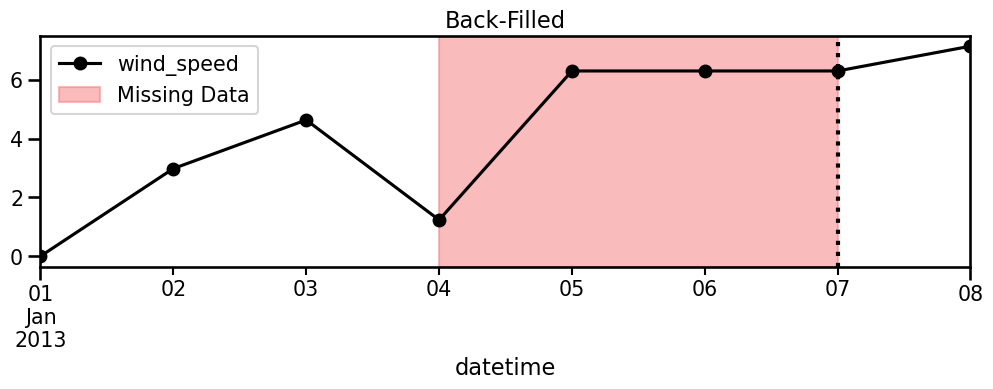

In [48]:
# Is this what you expected? We can see that ffill took the value from Friday, 01/04/2013 (1.23333) and used that value to fill in the missing values for Saturday and Sunday.
 
# Backward Fill
# Now we will explore the backward fill method. It fills in the missing value with the next given value. What do you think the graph will look like when backfill is applied?

ts_bfill = example.fillna(method='bfill')
print(ts_bfill)
ax = ts_bfill.plot(style='o-',title='Back-Filled',color='k');
ax.axvline("01-07-2013",color='k',lw=3, ls=':')
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

We can see that bfill took the value from the following Monday (6.30000) and filled that in for the missing values for Saturday and Sunday.

## Interpolate
If we use .interpolate(), pandas will calculate values that would fall between the previous valid value and the next valid value. Notice here that we have two missing values in a row. How do you think interpolate will approach this? Let's run the code to find out!

datetime
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    2.922222
2013-01-06    4.611111
2013-01-07    6.300000
2013-01-08    7.142857
Freq: D, Name: wind_speed, dtype: float64


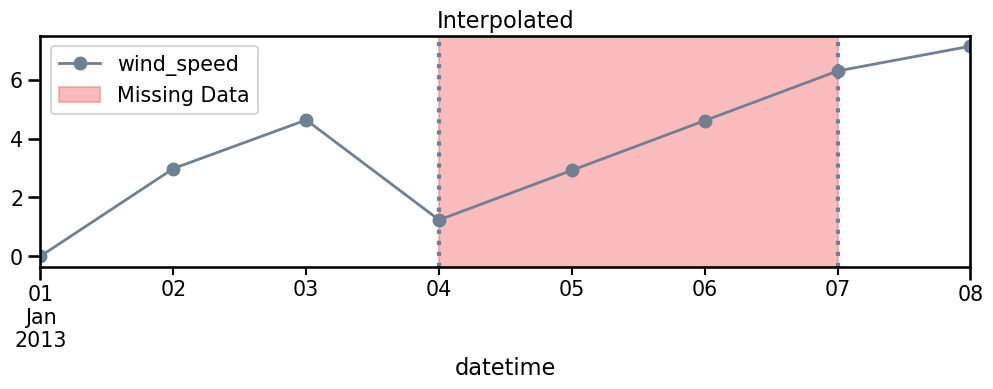

In [49]:
ts_interp = example.interpolate()
print(ts_interp)
ax = ts_interp.plot(style='o-', color='slategray', lw=2,title='Interpolated');
##  annotating start and end values used by interpolate
ax.axvline('01-04-2013', color='slategray',ls=':',lw=3)
ax.axvline('01-07-2013', color='slategray',ls=':',lw=3)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

As we can see above, instead of filling 01/05 and 01/06 with the 1.23 from Friday or 6.3 from Monday, it calculated values that fell in between those values: 2.9 and 4.6. Note too, how it handled the two missing values in a row! It did not just average the start and end dates, but it calculated the appropriate distance to fill in two points in a row.

## Comparison of Imputation Methods

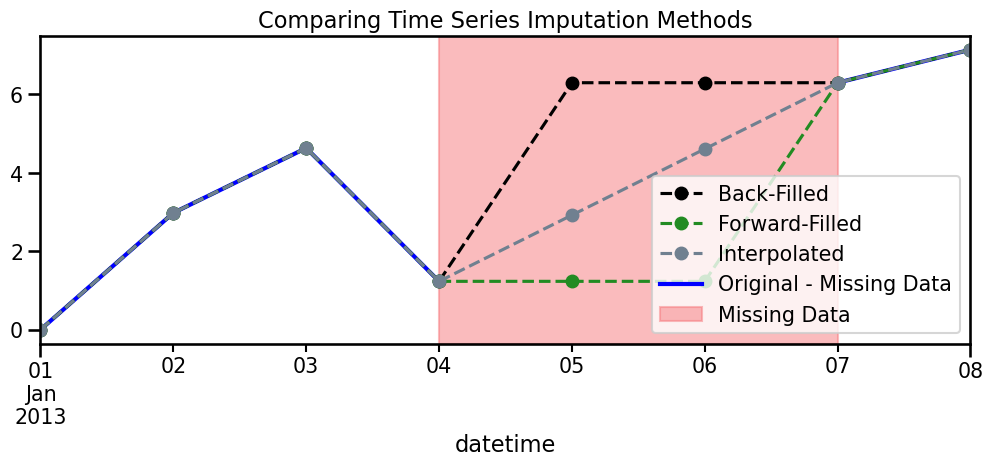

In [50]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Comparing Time Series Imputation Methods')
ts_bfill.plot(style='o--',label='Back-Filled',ax=ax, color='k');
ts_ffill.plot(style='o--',label='Forward-Filled',ax=ax, color='forestgreen');
ts_interp.plot(style='o--',label='Interpolated', ax=ax,color='slategray' );
example.plot(style='-', label='Original - Missing Data',ax=ax, color='blue',             lw=3,zorder=-1)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d',            alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

## Moving the legend outside the plot
- When using ax.legend(), you can give it the anchor point for the top-right corner of the plot by using the bbox_to_anchor argument and providing 2-number coordinates.
    - Coordinates: from 0 to 1 representing where 0 is the very left/bottom corner of the figure and 1 is the very top right

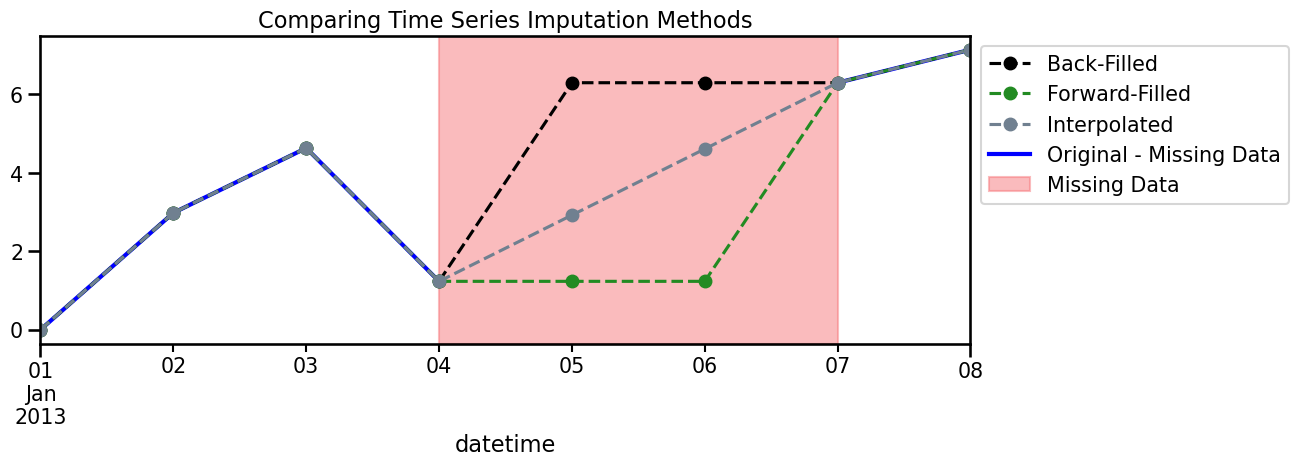

In [51]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Comparing Time Series Imputation Methods')
ts_bfill.plot(style='o--',label='Back-Filled',ax=ax, color='k');
ts_ffill.plot(style='o--',label='Forward-Filled',ax=ax, color='forestgreen');
ts_interp.plot(style='o--',label='Interpolated', ax=ax,color='slategray' );
example.plot(style='-', label='Original - Missing Data',ax=ax, color='blue', lw=3,zorder=-1)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend(bbox_to_anchor=[1,1]);

### Which imputation method should I choose?

First, note that all of the methods here assume that the values close to the missing value are similar (which may or may not be the case). There are also many advanced techniques for imputations, some of which we will discuss in a future lesson after exploring statistics with time series. In general, interpolating is a good method to start with unless you have reason to believe a forward or back fill method would be a better representation of your missing values.

## Summary
This lesson shows how time series can be resampled to change the frequency. When downsampling, we can use aggregate methods to more thoroughly represent the data. We can also create a dictionary to apply different aggregate methods to each feature. When setting a frequency, we must have a value for every point in that frequency, so upsampling may not be feasible if there are many missing values. However, if there are a reasonable amount of missing values, we are able to impute missing values for time series. We explored backfilling, forward filling, and interpolation techniques.



### Key Terms
resample

upsample

downsample

